                                                                 CODSOFT TASK 1

                                                           TITANIC SURVIVAL PREDICTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
data.shape

(891, 12)

In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Checking the value if null in data set
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#Drop non required column
data=data.drop(['Age'],axis=1)

In [7]:
#Check many statistical measure
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data['Survived'].value_counts()
#here 0 means person are not survived and 1 means person are survived

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

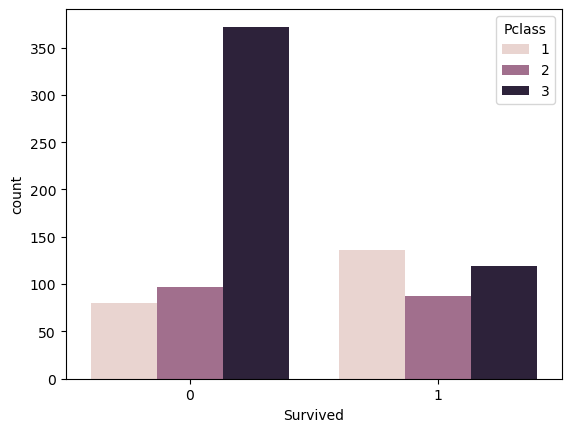

In [11]:
#Multiple bar diagram of survived with respect to class
#Visualizing the count of survivals
sns.countplot(x=data["Survived"],hue=data["Pclass"])

In [33]:
data["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

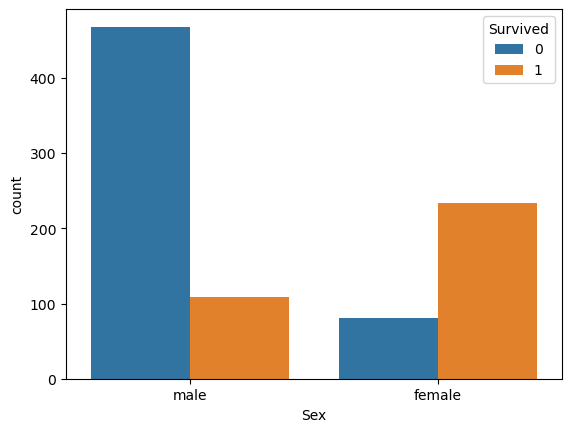

In [12]:
sns.countplot(x=data['Sex'],hue=data["Survived"])
#visualizing the count of survivals with respect to gender
#here 0 means person are not survived and 1 means person are survived so in this plot we see that most of the male population is not survived.

In [34]:
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [35]:
data['Sex'].unique()

array([1, 0], dtype=int64)

<Axes: >

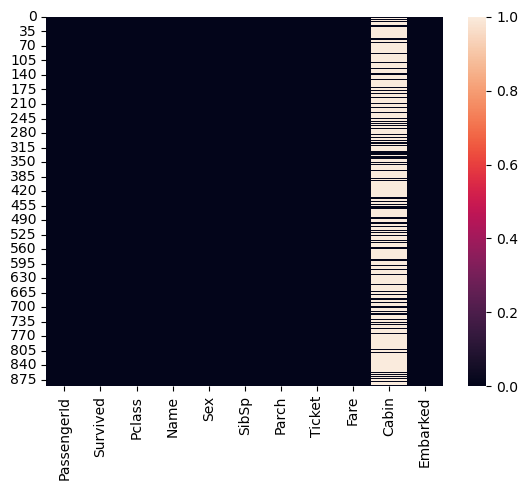

In [44]:
sns.heatmap(data.isnull())

In [14]:
import statsmodels.api as sm

In [15]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [16]:
data['Sex']=data['Sex'].map({'male':1,'female':0})
data
#here the dependent/response variable is categorical variable i.e means this take only binary data i.e 0,1 so we fit logistic regression model

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [18]:
x=data[['Pclass','Sex']]
y=data['Survived']
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464195
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                  0.3029
Time:                        15:15:02   Log-Likelihood:                -413.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.798e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2946      0.297     11.077      0.000       2.712       3.878
Pclass        -0.9606      0.

In [19]:
import scipy
from scipy.stats import chi2

In [20]:
chi2.pdf(359.46,2)
#this value very small to 0.05 i.e our model is significant

4.397671366614486e-79

Text(0.5, 1.0, 'Plot of the survived status respect to Pcalss')

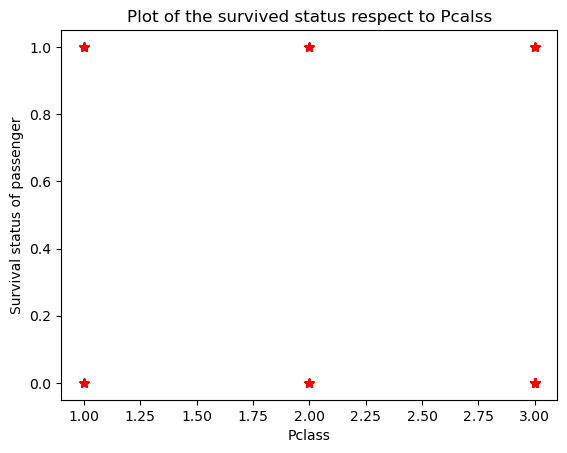

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data.Pclass,data.Survived,marker='*',color='red')
plt.xlabel("Pclass")
plt.ylabel("Survival status of passenger")
plt.title('Plot of the survived status respect to Pcalss')

                                                                  MODEL TRAINING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
x=data[['Pclass','Sex']]
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [26]:
len(x_train),len(x_test),len(y_train),len(y_test)

(712, 179, 712, 179)

In [29]:
Lreg=LogisticRegression(random_state=22)
Lreg.fit(x_train,y_train)
#Ravel return 1D array of the input

LogisticRegression(random_state=22)

                                                         MODEL PREDICTION

In [30]:
y_predict=print(Lreg.predict(x_test))
y_predict

[1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0]


In [37]:
print(y_test)

816    0
789    0
869    1
235    0
473    1
      ..
341    1
389    1
691    1
698    0
463    0
Name: Survived, Length: 179, dtype: int64


In [42]:
import warnings
warnings.filterwarnings("ignore")

res= Lreg.predict([[2,0]])

if(res==0):
    print("So Sorry!Not Survived")

else:
    print("Survived")

Survived


In [43]:
import warnings
warnings.filterwarnings("ignore")

res= Lreg.predict([[2,1]])

if(res==0):
    print("So Sorry!Not Survived")

else:
    print("Survived")

So Sorry!Not Survived
